## Line Detection - Hough Lines & Probabilistic Hough Lines

### خطوط هاف (Hough Lines)

تبدیل هاف (Hough Transform) یک روش قدرتمند برای شناسایی اشکال هندسی مانند خطوط 
مستقیم در تصاویر است. در OpenCV، تابع `cv2.HoughLines` برای تشخیص خطوط استفاده می‌شود.

در این روش، هر نقطه روی لبه‌های تصویر می‌تواند بی‌نهایت خط را نمایش دهد. تبدیل هاف این نقاط را به فضای پارامتری (ρ, θ) منتقل می‌کند، که در آن ρ فاصله عمود از مبدأ مختصات تا خط و θ زاویه خط نسبت به محور افقی است. نقاطی که روی یک خط قرار دارند، در فضای پارامتری به یک نقطه مشترک نگاشت می‌شوند. با شمارش نقاط در این فضا، خطوط غالب تصویر شناسایی می‌شوند.

این روش به ویژه برای تصاویر با نویز یا خطوط ناقص بسیار مؤثر است و می‌تواند خطوط را حتی اگر بخشی از آن‌ها حذف شده باشد، تشخیص دهد.

### تبدیل هاف احتمالی (Probabilistic Hough Transform)

تبدیل هاف احتمالی یا Probabilistic Hough Transform (PHT) نسخه‌ای بهینه‌تر از تبدیل هاف استاندارد است که برای تشخیص خطوط در تصاویر به کار می‌رود. در این روش، به جای بررسی همه نقاط لبه، تنها تعدادی نقطه به صورت تصادفی انتخاب می‌شوند و خطوط احتمالی از روی آن‌ها محاسبه می‌گردد.

در OpenCV، تابع `cv2.HoughLinesP` این روش را پیاده‌سازی می‌کند. خروجی این تابع به جای پارامترهای (ρ, θ)، مختصات نقاط ابتدایی و انتهایی هر قطعه‌خط را بازمی‌گرداند. این باعث می‌شود که خطوط به صورت قطعه‌خط‌های مجزا شناسایی شوند و رسم آن‌ها روی تصویر ساده‌تر باشد.

مزایای تبدیل هاف احتمالی:
- سرعت بالاتر نسبت به روش استاندارد به دلیل کاهش تعداد محاسبات
- مناسب برای تصاویر بزرگ یا زمانی که خطوط زیادی وجود دارد
- ارائه مختصات دقیق نقاط ابتدایی و انتهایی هر خط

به طور خلاصه، تبدیل هاف احتمالی روشی سریع و کارآمد برای شناسایی خطوط در تصاویر است که به ویژه در کاربردهای بلادرنگ (Real-time) بسیار مفید است.

**پس به طور کلی در opencv : از دوتابع زیر برای تشخیص خطوط استفاده می کنیم**

- `cv2.HoughLines`: این تابع تبدیل هاف استاندارد را پیاده‌سازی می‌کند و خطوط را به صورت پارامترهای (ρ, θ) بازمی‌گرداند.
- `cv2.HoughLinesP`: این تابع تبدیل هاف احتمالی را پیاده‌سازی می‌کند و خطوط را به صورت قطعه‌خط‌هایی با نقاط ابتدایی و انتهایی بازمی‌گرداند.

برای استفاده از این توابع، ابتدا باید تصویر را به لبه‌ها (معمولاً با Canny) تبدیل کنید و سپس یکی از توابع بالا را روی تصویر لبه‌یابی‌شده اعمال کنید. خروجی این توابع را می‌توان برای رسم خطوط روی تصویر اصلی استفاده کرد.

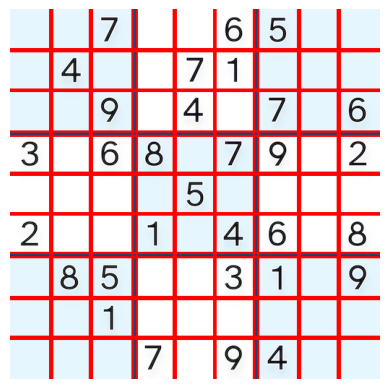

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Read the image from file
image = cv2.imread("sudoku.png")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Extract edges using the Canny algorithm
edges = cv2.Canny(gray, 100, 170, apertureSize=3)
# Detect lines using the standard Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 240)

# Draw the detected lines on the image
for rho, theta in lines[:, 0]:
    # Calculate the cosine and sine components of the angle
    a = np.cos(theta)
    b = np.sin(theta)
    # Calculate a point on the line
    x0 = a * rho
    y0 = b * rho
    # Calculate the start and end points for drawing the line
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    # Draw the line on the image
    cv2.line(image, (x1, y1), (x2, y2), (0,0,255), 2)

# Display the final image with detected lines
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


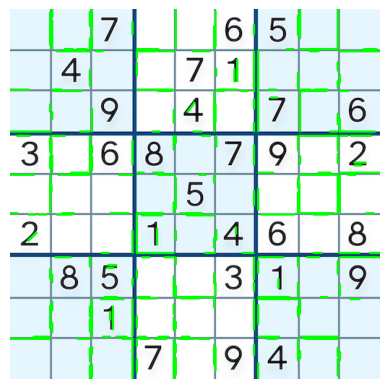

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Read the image from file
image = cv2.imread("sudoku.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize=3)

# Detect lines using the Probabilistic Hough Transform
linesP = cv2.HoughLinesP(edges, 1, np.pi / 180, 0,5,10)

# Draw the detected lines on a copy of the original image
img_with_lines = image.copy()
for line in linesP:
    x1, y1, x2, y2 = line[0]
    cv2.line(img_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the final image with detected lines
plt.imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


##